## KNN (k-nearest neighbor)

Jawab:
- PROSES ALGORITMA KNN

1. KNN akan menghitung jarak antara nilai yang dicari dengan setiap poin/tetangga menggunakan formula euclidean distance
2. Memilih sejumlah k-tetangga terdekat, 
3. Lalu melakukan voting, melihat label terbanyak dalam tetangga tersebut. Jika 70% dari k-tetangga terdekat berlabel A, maka nilai yang dicari pun akan berlabel A


- KEKURANGAN ALGORITMA KNN

1. Sangat sensitif terhadap data pencilan (outlier). Performanya buruk jika ada data pencilan
2. Jika k genap, KNN akan kebingunan jika jumlah label dari tetangga terdekat sama. 
Misal ditentukan k=4 dan ada 2 label. Setelah dihitung dengan algoritma KNN, didapatkan bahwa 4 tetangga terdekatnya memiliki jumlah label yang sama (label A=2 tetangga, label B=2 tetangga). Maka KNN akan memilih antara kedua label tersebut secara random.
Untuk mengatasinya, gunakan `weight` . Defaultnya adalah `uniform` artinya semua jarak berbobot sama, `weigth='distance'` maka tetangga dg jarak lebih dekat memiliki bobot yg lebih besar. (user juga dpt menentukan fungsi pembobot yg lain)

MEMILIH HYPERPARAMETER K
- harus tau sebaran data kita. jika ada outlier, maka lebih baik k=kecil, utk mengurangi peluang outlier masuk ke prediksi. 
- harus tau kenapa ada outlier, kalo karena error -> buang datanya. kalo emang datanya begitu, yaudah pilih k kecil
- jika data tidak mengumpul/ melebar/ st deviasinya besar -> memilih k besar, utk meningkatkan tk generalisasi data
- besar / kecil k tergantung pada jumlah data
- k jangan sama dengan jumlah data, bisa overfitting

### Aplikasi algoritma KNN

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
# cek data outlier
from scipy import stats
# melihat seberapa jauh data dari nilai rata2 sampel/populasi -> Tabel Z
# semakin besar nilai z score, probabilitas makin kecil (probabilitas data ada dipoin itu)
# misal ada data dg z score > 3, maka itu adalah data pencilan
z = stats.zscore(df) 

In [4]:
print(np.where(z>3))

(array([15], dtype=int64), array([1], dtype=int64))


In [5]:
# maka ada 1 outlier, jadi aman. dengan begitu kita dapat menggunakan KNN
z[15][1]

3.0907752482994253

<h2> Cara mengaplikasikan ML dengan library SKLearn </h2>

1. Pilih <b> model </b> atau algoritma yang akan digunakan
``` contoh model : decision tree, random forest, logistic regression, linear reg ```
2. Pilih <b> hyperparameter </b> ketika membuat objek model.
3. <b> Pisahkan antara data feature dan data target </b>. SKLearn hanya menerima data input bentuk matrix, bukan vektor
4. Perintahkan model untuk <b>mempelajari data </b> dengan menggunakan <i> method .fit() </i>
5. <b> Aplikasikan model ke dalam test data </b> dengan menggunakan method <i> .predict()</i> utk supervised learning atau <i>.transform()</i> untuk unsupervised learning


In [6]:
# import class model
from sklearn.neighbors import KNeighborsClassifier as knn

In [7]:
#  membuat objek model dan memilih hiperparameter
model_knn = knn(n_neighbors=6, weights='distance')

In [8]:
# memisahkan antara data fitur dan data target
x = df.drop('species', axis=1)
y = df['species']

In [9]:
# Perintahkan model utk mempelajari data dengan method .fit()
model_knn.fit(x,y)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [10]:
# prediksi / aplikasikan model ke dalam data tes
x_new = np.array([
                [2.5, 4, 3, 0.1],
                [1, 3.5, 1.7, 0.4],
                [4, 1, 3, 0.3]
                ])

y_new = model_knn.predict(x_new)

In [11]:
y_new

array([0., 0., 1.])

nah, didapat 0 , 0, 1. dimana 0 -> sentosa dan 1 -> versicolor


dengan begitu y_new adalah sentosa

In [14]:
model_knn.score(x_new,y_new)

1.0

## Linear Regression

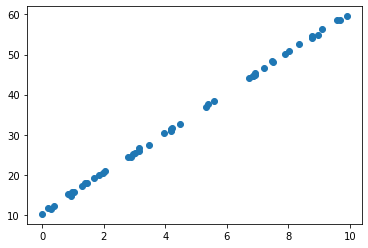

In [18]:
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 5*x + 10 + rng.rand(50) # x=slope, 10=intercept

plt.scatter(x,y)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_lr = LinearRegression(fit_intercept=True) #fit_intercept -> utk menghitung nilai intercept dari data

In [25]:
# x harus berbentuk matriks

model_lr.fit(x[:,np.newaxis],y)

LinearRegression()

In [26]:
y_predict = model_lr.predict(x[:, np.newaxis])

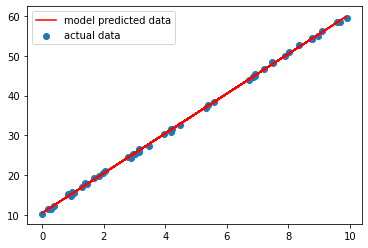

In [30]:
plt.plot(x,y_predict, 'r', label='model predicted data')
plt.scatter(x,y, label='actual data')
plt.legend()

In [37]:
slope = model_lr.coef_
print('slope dari model :', round(slope[0],3))

intercept = model_lr.intercept_
print('intercept dari model :', round(intercept,3))

slope dari model : 5.008
intercept dari model : 10.466


dengan begitu nilai slope dan intercept dari model mendekati slope dan intercept dari data asli

y = 5*x + 10 + rng.rand(50) # x=slope coef=5, 10=intercept

### Linear regression multidimensi

In [49]:
# model data multi dimensi
x = rng.rand(50,3)
y = np.dot(x, [4,2,7]) + 20 # ada 3 slope, x*4 + x*2 + x*7 + 20

In [50]:
model_lr2 = LinearRegression(fit_intercept=True)

In [51]:
model_lr2.fit(x,y)

LinearRegression()

In [52]:
y_predict = model_lr2.predict(x)

In [54]:
# parameter
model_lr2.coef_

array([4., 2., 7.])

In [55]:
model_lr2.intercept_

20.0

parameter model sama dengan parameter data aktual
x*4 + x*2 + x*7 + 20